# [Multiclass Classification](http://scikit-learn.org/stable/modules/multiclass.html#multiclass)

## Review

You've done...

#### Regression

* Linear regression to predict weight from height
* **Multivariate** linear regresion to predict weight from height and gender

#### Binary Classification

If our data set contains only 2 genders, we have a binary classification problem.

* Logistic regression to predict gender (*categorical*) from height (*univariate continuous*)  
* Logistic regression to predict gender (*categorical*) from height and weight (*multivariate continuous*)

## Today

What do we do with are real-world data set with more than 2 genders?  
Or more than 2 colors?  
Or more than 2 types of endangered species?  
Or more than categories/classes of any type?  

Today you're going to do...

#### Multiclass Classification

* Predict crime (*multiclass*) from latitude (*univariate*)
* Predict crime (*multiclass*) from lat, lon, date, time, neighborhood (*multivariate*)

When we want to predict something that isn't just one class or another (binary), but has more than one category or class, we call that **Multiclass Classification**  


In [33]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [45]:
# df = pd.read_csv('https://raw.githubusercontent.com/hackoregon/hack-university-database-engineering/master/Data/Crime%20Data/crimedata.csv')
# del df['record_id']
# df.to_csv('../shared-resources/portland_crime.csv')
df = pd.read_csv('../shared-resources/portland_crime.csv', index_col=0, header=0)

In [48]:
df.head(3)

,id,report_date,report_time,major_offense_type,address,neighborhood,police_precinct,police_district,xcoordinate,ycoordinate
0,10,2014-01-06,09:25:00,Sex Offenses,Unknown/Not Available,SOUTH PORTLAND,PORTLAND PREC CE,890,NaN,NaN
1,11,2014-01-05,17:53:00,Liquor Laws,"SW ALDER ST and SW 10TH AVE, PORTLAND, OR 97205",DOWNTOWN,PORTLAND PREC CE,842,7.642970e+06,683475.64534
2,12,2014-01-23,22:15:00,Burglary,"251-399 block of NE 80TH AVE, PORTLAND, OR 97213",MONTAVILLA,PORTLAND PREC EA,902,7.668701e+06,684231.79199


In [49]:
df.describe()

,id,xcoordinate,ycoordinate
count,61497.000000,5.396300e+04,53963.000000
mean,30758.000000,7.655826e+06,684865.814018
std,17752.799089,1.611395e+04,11582.723344
min,10.000000,7.568600e+06,588728.800520
25%,15384.000000,7.643957e+06,678147.698490
50%,30758.000000,7.650161e+06,684086.216210
75%,46132.000000,7.669203e+06,689327.735240
max,61506.000000,7.717426e+06,726347.339900


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f28bc552780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f28bde60438>]], dtype=object)

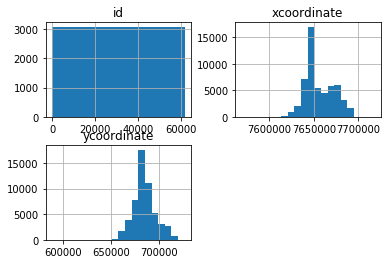

In [50]:
df.hist(bins=20)

So we only have 3 numerical features to work with?  
And one of them is useless (**id**)!

#### **NOTE:** IDs are not always useless.

One Kaggle competition was won by a machine that figured out that the ID contained the answer!  
IDs often contain information about when the records were inserted into the DB.


## Datetimes (Pandas **Timestamp**)

There are lots of [numerical features](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) we can extract from datetimes (Timestamp) objects

* year
* month
* day of month
* day of year
* day of week
* is it a holiday
* is it a weekday

...

In [54]:
pd.to_datetime(df.report_date).describe()

count                   61497
unique                    365
top       2014-01-01 00:00:00
freq                      299
first     2014-01-01 00:00:00
last      2014-12-31 00:00:00
Name: report_date, dtype: object

In [55]:
df['report_date'] = pd.to_datetime(df.report_date + ' ' + df.report_time)
df.head(3)

,id,report_date,report_time,major_offense_type,address,neighborhood,police_precinct,police_district,xcoordinate,ycoordinate,report_datetime
0,10,2014-01-06 09:25:00,09:25:00,Sex Offenses,Unknown/Not Available,SOUTH PORTLAND,PORTLAND PREC CE,890,NaN,NaN,2014-01-06 09:25:00
1,11,2014-01-05 17:53:00,17:53:00,Liquor Laws,"SW ALDER ST and SW 10TH AVE, PORTLAND, OR 97205",DOWNTOWN,PORTLAND PREC CE,842,7.642970e+06,683475.64534,2014-01-05 17:53:00
2,12,2014-01-23 22:15:00,22:15:00,Burglary,"251-399 block of NE 80TH AVE, PORTLAND, OR 97213",MONTAVILLA,PORTLAND PREC EA,902,7.668701e+06,684231.79199,2014-01-23 22:15:00


## What about categories like neighborhood?

`pd.get_dummies` can convert any categorical variable to separate binary class variables, one in each column.  
`pd.concat` can combine multiple tables into one


So let's add the neighborhood

**NOTE:** Only do this for *categorical* variables, **not** *ordinals*

In [57]:
neighborhood = pd.get_dummies(df['neighborhood'])
neighborhood.head(3)

,ALAMEDA,ARBOR LODGE,ARDENWALD,ARGAY,ARLINGTON HGHTS,ARNOLD CREEK,ASHCREEK,BEAUMONT-WILSHR,BEAVERTON - FIVE OAKS 3C,BOISE,...,TUALATIN - TU3,UNIVERSITY PARK,VERNON,W PORTLAND PARK,WEST BEAVERTON,WILKES,WOODLAND PARK,WOODLAWN,WOODSTOCK,WSLOT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df = pd.concat([df, neighborhood], axis=1)

In [59]:
df.describe()

,id,xcoordinate,ycoordinate,ALAMEDA,ARBOR LODGE,ARDENWALD,ARGAY,ARLINGTON HGHTS,ARNOLD CREEK,ASHCREEK,...,TUALATIN - TU3,UNIVERSITY PARK,VERNON,W PORTLAND PARK,WEST BEAVERTON,WILKES,WOODLAND PARK,WOODLAWN,WOODSTOCK,WSLOT
count,61497.000000,5.396300e+04,53963.000000,61497.000000,61497.000000,61497.000000,61497.000000,61497.000000,61497.000000,61497.000000,...,61497.000000,61497.000000,61497.000000,61497.000000,61497.000000,61497.000000,61497.000000,61497.000000,61497.000000,61497.000000
mean,30758.000000,7.655826e+06,684865.814018,0.002358,0.010131,0.000260,0.008992,0.002683,0.000553,0.001691,...,0.000016,0.005512,0.003041,0.002293,0.000016,0.008033,0.000407,0.005675,0.009757,0.000033
std,17752.799089,1.611395e+04,11582.723344,0.048501,0.100140,0.016128,0.094401,0.051729,0.023507,0.041089,...,0.004032,0.074042,0.055060,0.047829,0.004032,0.089267,0.020159,0.075120,0.098293,0.005703
min,10.000000,7.568600e+06,588728.800520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15384.000000,7.643957e+06,678147.698490,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30758.000000,7.650161e+06,684086.216210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46132.000000,7.669203e+06,689327.735240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61506.000000,7.717426e+06,726347.339900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
df_crime = pd.get_dummies(df2.major_offense_type)
df_crime.describe()

,Aggravated Assault,Arson,"Assault, Simple",Burglary,Curfew,DUII,Disorderly Conduct,Drugs,Embezzlement,Forgery,...,Offenses Against Family,Prostitution,Rape,Robbery,Runaway,Sex Offenses,Stolen Property,Trespass,Vandalism,Weapons
count,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,...,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000
mean,0.020674,0.000621,0.039637,0.074344,0.000282,0.024361,0.053877,0.048666,0.002239,0.010196,...,0.000150,0.002558,0.000847,0.015068,0.000188,0.001712,0.001317,0.043512,0.076658,0.005869
std,0.142293,0.024908,0.195106,0.262333,0.016796,0.154170,0.225777,0.215171,0.047261,0.100460,...,0.012267,0.050516,0.029083,0.121826,0.013714,0.041340,0.036265,0.204008,0.266051,0.076387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df2 = df.dropna(how='any').copy()
X = df2[['xcoordinate', 'ycoordinate'] + list(neighborhood.columns)]
y=df_crime
lr = lr.fit(X, y)
lr.score(X, y)

0.030588458929481258

In [77]:
predicted_crime = pd.DataFrame(lr.predict(X), columns=df_crime.columns)
predicted_crime.describe()

,Aggravated Assault,Arson,"Assault, Simple",Burglary,Curfew,DUII,Disorderly Conduct,Drugs,Embezzlement,Forgery,...,Offenses Against Family,Prostitution,Rape,Robbery,Runaway,Sex Offenses,Stolen Property,Trespass,Vandalism,Weapons
count,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,...,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000,53158.000000
mean,0.020674,0.000621,0.039637,0.074344,0.000282,0.024361,0.053877,0.048666,0.002239,0.010196,...,0.000150,0.002558,0.000847,0.015068,0.000188,0.001712,0.001317,0.043512,0.076658,0.005869
std,0.011193,0.001491,0.015335,0.042676,0.000610,0.016494,0.032121,0.044922,0.002331,0.008827,...,0.000398,0.007376,0.001461,0.007465,0.000471,0.002168,0.001193,0.021163,0.033808,0.005029
min,-0.002699,-0.001971,-0.008048,-0.049676,-0.000975,-0.048277,-0.009297,-0.016855,-0.008214,-0.020846,...,-0.000589,-0.027133,-0.000750,-0.004751,-0.001735,-0.017173,-0.002469,-0.002139,-0.017889,-0.001281
25%,0.012600,-0.000045,0.027314,0.034891,-0.000013,0.013141,0.034225,0.020097,0.000466,0.004792,...,-0.000015,-0.000360,0.000016,0.010143,-0.000035,0.000201,0.000058,0.028480,0.054036,0.001989
50%,0.019229,0.000068,0.039491,0.076104,0.000014,0.021003,0.044680,0.034633,0.002142,0.007741,...,0.000014,0.000327,0.000776,0.014562,0.000030,0.001389,0.001439,0.038369,0.074561,0.005908
75%,0.025693,0.000719,0.049237,0.099379,0.000553,0.030236,0.059674,0.058753,0.003223,0.014057,...,0.000162,0.001507,0.001179,0.019158,0.000154,0.003029,0.002297,0.059566,0.096001,0.007543
max,0.200218,0.010366,0.080875,0.502129,0.003910,0.500176,0.500881,1.000000,0.025281,0.500471,...,0.002482,0.200899,0.025516,0.067036,0.003271,0.023268,0.005184,1.000000,0.501225,0.057344


In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', solver='lbfgs', multi_class='multinomial')
y = df2.major_offense_type.values.reshape(-1, 1)
print(y.shape)
lr = lr.fit(X, y)  # .values[:,1].reshape(-1,1))
lr.score(X, y)

(53158, 1)


/home/hobs/.virtualenvs/civicu/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0036683095677038265